# Analysis of the results of PU learning
**Instruction**  
The aim of this notebook is to analyze the results of PU learning.  
Please execute 'PU_learning' mode and 'PU_predict' mode before executing the following code.  
The results by 'PU_learning' mode are stored in the folder `../PU_results/`.  
The inference results by 'PU_predict' mode are stored in the folder `../PU_preds/`.  

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
sys.path.append('../')
from process import Mol2Vec
from rdkit import Chem
plt.rcParams['font.family'] = 'Arial'

## Summary of TPR and SE

In [2]:
X_list = ['Mordred', 'ECFP','Avalon','ErG','RDKit','MACCSKeys','Estate']
f_list = ['RF-PU', 'NN-PU', 'SVC-PU', 'GBDT-PU']
columns = ['TPR', 'SE', 'TPR*SE']
results = []
row_names = []

for X in X_list:
    for f in f_list:
        SE = []
        df_res = pd.read_csv(f'../PU_preds/unlabeled_smile_{X}_{f}.csv')
        for i in range(10):
            if df_res[f'y{i+1}'].sum() != 0:
                SE.append(df_res.shape[0]/df_res[f'y{i+1}'].sum())
        df_res = pd.read_csv(f'../PU_results/{X}.csv')
        tpr = df_res[df_res['Model']==f]['rec_ave'].item()
        std = df_res[df_res['Model']==f]['rec_std'].item()
        results.append([tpr, np.mean(SE), tpr * np.mean(SE)])
        row = f'{X}_{f}'
        row_names.append(row)

C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
df = pd.DataFrame(results, index=row_names, columns=columns)
df

,TPR,SE,TPR*SE
Mordred_RF-PU,0.134441,69.204965,9.303954
Mordred_NN-PU,0.000000,4936.085231,0.000000
Mordred_SVC-PU,0.300000,1.000000,0.300000
Mordred_GBDT-PU,0.961004,1.002106,0.963028
ECFP_RF-PU,0.215773,87.822636,18.949764
ECFP_NN-PU,0.269940,1110.368434,299.732613
ECFP_SVC-PU,0.390385,12441.387613,4856.926318
ECFP_GBDT-PU,0.621338,2.124469,1.320014
Avalon_RF-PU,0.283843,90.647623,25.729677
Avalon_NN-PU,0.206627,2010.980494,415.522277


## Suggested molecules

In [4]:
# Read suggested molecules
df = pd.read_csv('../PU_preds/unlabeled_smile_Avalon_SVC-PU.csv')
print('All: ', df.shape[0])
for i in range(11):
    p = round(1 - i/10, ndigits=1)
    print(f'P({p:.1f}): ', df[df['y_ave'] == p].shape[0])

All:  185037
P(1.0):  1
P(0.9):  0
P(0.8):  0
P(0.7):  0
P(0.6):  0
P(0.5):  1
P(0.4):  1
P(0.3):  11
P(0.2):  99
P(0.1):  184924
P(0.0):  0


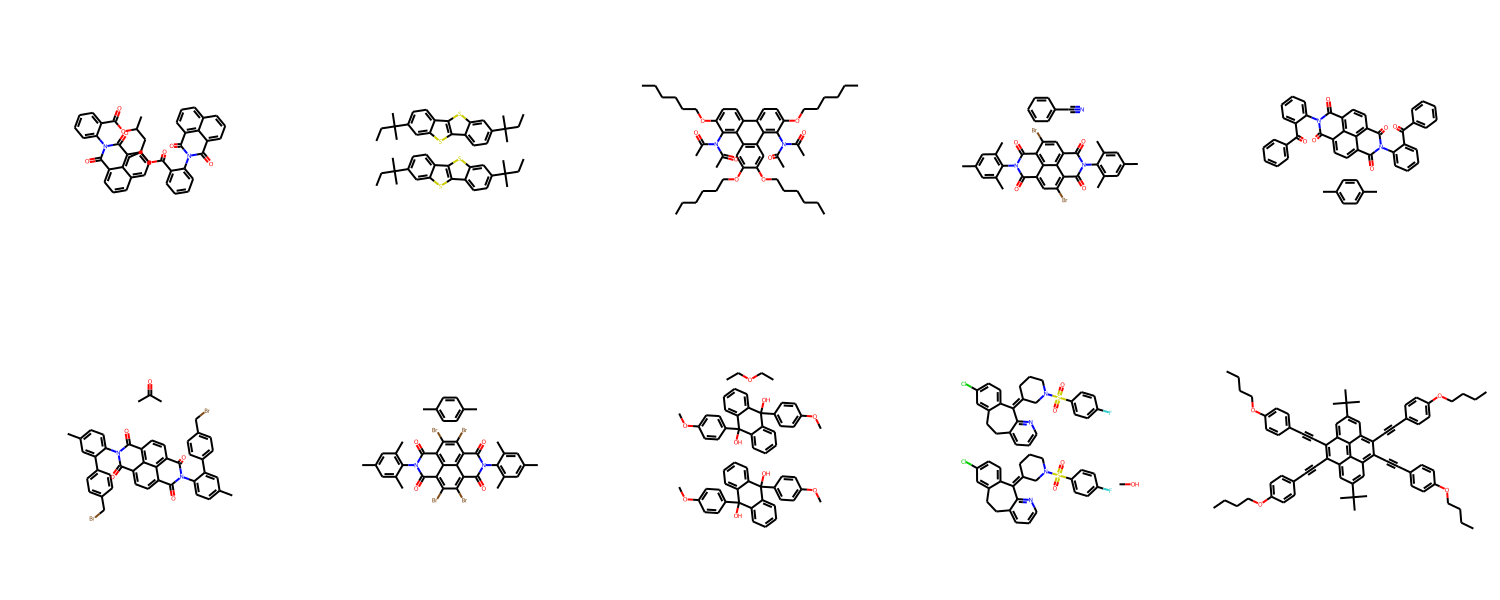

In [428]:
# Visualize molecular structures
p = 0.2
# i = 8
smiles_list = list(df[df['y_ave'] == p]['SMILES'])
# smiles_list[13] = 'NC(NO)=C([N+](=O)[O-])[N+](=O)[O-]'
# smiles_list[24] = 'C1N2CN3CN1CN(C2)C3.CC1(C)C2CCC(O)(C(=O)O)C1C2'
# smiles_list[smiles_list.index('CC(C)[Si]1(C)CC[Si](C)(C(C)C)c2ccccc2[Si](C)(C(C)C)[Si](C)(C(C)C)c2ccccc21.CC(C)[Si]1(C)CC[Si](C)(C(C)C)c2ccccc2[Si](C)(C(C)C)[Si](C)(C(C)C)c2ccccc21')] = 'CC(C)[Si]1(C)CC[Si](C)(C(C)C)c2ccccc2[Si](C)(C(C)C)[Si](C)(C(C)C)c2ccccc21'
# smiles_list[smiles_list.index('CCC(C)(C)c1ccc2c(c1)sc1c3ccc(C(C)(C)CC)cc3sc21.CCC(C)(C)c1ccc2c(c1)sc1c3ccc(C(C)(C)CC)cc3sc21')] = 'CCC(C)(C)c1ccc2c(c1)sc1c3ccc(C(C)(C)CC)cc3sc21'
# smiles_list[smiles_list.index('O=C(O)CCP(c1ccccc1)c1ccccc1.O=C(O)CCP(c1ccccc1)c1ccccc1')] = 'O=C(O)CCP(c1ccccc1)c1ccccc1'
# smiles_list[smiles_list.index('c1ccc(-c2cccc3cc4ccccc4cc23)cc1.c1ccc(-c2cccc3cc4ccccc4cc23)cc1')] = 'c1ccc(-c2cccc3cc4ccccc4cc23)cc1'
# smiles_list[smiles_list.index('Nc1ccc(-c2ccc(N)cc2)cc1.Nc1ccc(-c2ccc(N)cc2)cc1.O=C1C=CC(=O)C=C1')] = 'Nc1ccc(-c2ccc(N)cc2)cc1.O=C1C=CC(=O)C=C1'
# smiles_list[smiles_list.index('CCOCC.COc1ccc(C2(O)c3ccccc3C(O)(c3ccc(OC)cc3)c3ccccc32)cc1.COc1ccc(C2(O)c3ccccc3C(O)(c3ccc(OC)cc3)c3ccccc32)cc1')] = 'CCOCC.COc1ccc(C2(O)c3ccccc3C(O)(c3ccc(OC)cc3)c3ccccc32)cc1'
# smiles_list[smiles_list.index('CO.O=S(=O)(c1ccc(F)cc1)N1CCCC(=C2c3ccc(Cl)cc3CCc3cccnc32)C1.O=S(=O)(c1ccc(F)cc1)N1CCCC(=C2c3ccc(Cl)cc3CCc3cccnc32)C1')] = 'CO.O=S(=O)(c1ccc(F)cc1)N1CCCC(=C2c3ccc(Cl)cc3CCc3cccnc32)C1'
smiles_list = sorted(smiles_list, key=len)
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Chem.Draw.MolsToGridImage(mols[85:95], molsPerRow=5, subImgSize=(300,300), useSVG=True)

# with open(f'mols/p{p}_mols_{i}.svg', mode='w') as f:
#     f.write(img.data)

## Manifold visualization

In [369]:
df_pos = pd.read_csv('../datasets/positive_smiles.csv')
df_unl = pd.read_csv('../PU_preds/unlabeled_smile_Avalon_SVC-PU.csv')

fptype = 'Avalon'
pos_mol_vec = [Mol2Vec(smiles, fptype=fptype) for smiles in df_pos['SMILES']]
unl_mol_vec_all = [Mol2Vec(smiles, fptype=fptype) for smiles in df_unl.sample(500, random_state=0)['SMILES']]
unl_mol_vec_suggest = [Mol2Vec(smiles, fptype=fptype) for smiles in df_unl[df_unl['y_ave'] >= 0.2]['SMILES']]

X = unl_mol_vec_all + unl_mol_vec_suggest + pos_mol_vec

In [381]:
X = StandardScaler().fit_transform(X)

c_list = []
for i in range(len(unl_mol_vec_all)):
    c_list.append('skyblue')
for i in range(len(unl_mol_vec_suggest)):
    c_list.append('orange')
for i in range(len(pos_mol_vec)):
    c_list.append('red')
    
mani = TSNE(n_components=2, random_state=0)
latent = mani.fit_transform(X)

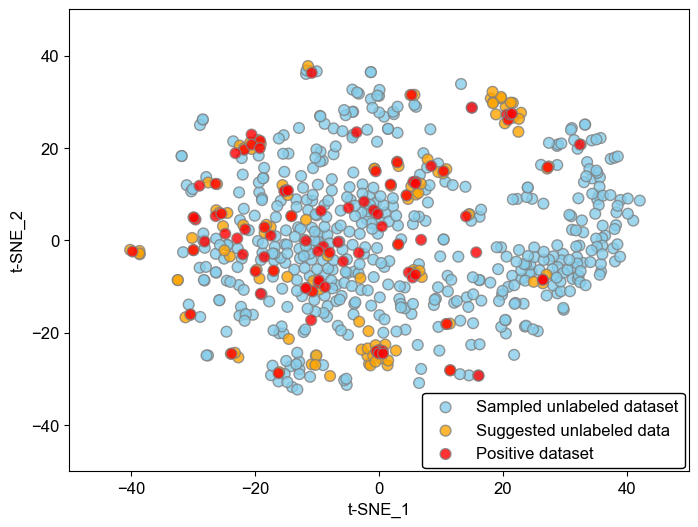

In [408]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 12
l1 = len(unl_mol_vec_all)
l2 = len(unl_mol_vec_all)+len(unl_mol_vec_suggest)
l3 = len(unl_mol_vec_all)+len(unl_mol_vec_suggest) + len(pos_mol_vec)
plt.scatter(latent[:l1,0], 
            latent[:l1,1], 
            c=c_list[:l1], 
            alpha=0.8, ec='grey', s=60, label='Sampled unlabeled dataset')
plt.scatter(latent[l1:l2,0], 
            latent[l1:l2,1], 
            c=c_list[l1:l2], alpha=0.8, ec='grey', s=60, label='Suggested unlabeled data')
plt.scatter(latent[l2:l3,0], 
            latent[l2:l3,1], 
            c=c_list[l2:l3], alpha=0.8, ec='grey', s=60, label='Positive dataset')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.legend(bbox_to_anchor=(0.57, 0.17), loc='upper left', borderaxespad=0, fontsize=12,
           framealpha = 1, facecolor="white" ,edgecolor="black")